# КМ-01 | Романецький Микита | Варіант № 1

In [1]:
from oct2py import octave
import pandas as pd
import matplotlib.pyplot as plt


## Python

In [2]:
def runge_kutta(x0, y0, z0, h, x_target):
    x = x0
    y = y0
    z = z0

    results = [('x', 'w(x)', 'y(x)')]
    
    while x <= x_target:
        results.append((x, z, y))
        
        k1y = h * z
        k1z = h * (2 * z - y)

        k2y = h * (z + 0.5 * k1z)
        k2z = h * (2 * (z + 0.5 * k1z) - (y + 0.5 * k1y))

        k3y = h * (z + 0.5 * k2z)
        k3z = h * (2 * (z + 0.5 * k2z) - (y + 0.5 * k2y))

        k4y = h * (z + k3z)
        k4z = h * (2 * (z + k3z) - (y + k3y))

        y = y + (1/6) * (k1y + 2 * k2y + 2 * k3y + k4y)
        z = z + (1/6) * (k1z + 2 * k2z + 2 * k3z + k4z)
        x = x + h

    return results


x0 = 2
y0 = 1
z0 = -2
h = 0.2
x_target = 4

results = runge_kutta(x0, y0, z0, h, x_target+h)

# Створюємо датафрейм з результатами
df_python = pd.DataFrame(results[1:], columns=results[0]).set_index('x')

print('Розв\'язок Python:\n')
print(df_python)


Розв'язок Python:

          w(x)       y(x)
x                        
2.0  -2.000000   1.000000
2.2  -3.175600   0.488600
2.4  -4.773720  -0.298266
2.6  -6.923826  -1.457506
2.8  -9.792000  -3.115438
3.0 -13.590811  -5.436057
3.2 -18.591750  -8.631535
3.4 -25.140913 -12.975505
3.6 -33.678714 -18.819886
3.8 -44.764698 -26.616125
4.0 -59.108694 -36.942026


## Octave

In [3]:
# Визначаємо функцію Runge-Kutta в Octave
octave.eval("""
function results = runge_kutta_oct(x0, y0, z0, h, x_target)
    x = x0;
    y = y0;
    z = z0;

    results = [x, z, y];
    
    while x <= x_target
        k1y = h * z;
        k1z = h * (2 * z - y);

        k2y = h * (z + 0.5 * k1z);
        k2z = h * (2 * (z + 0.5 * k1z) - (y + 0.5 * k1y));

        k3y = h * (z + 0.5 * k2z);
        k3z = h * (2 * (z + 0.5 * k2z) - (y + 0.5 * k2y));

        k4y = h * (z + k3z);
        k4z = h * (2 * (z + k3z) - (y + k3y));

        y = y + (1/6) * (k1y + 2 * k2y + 2 * k3y + k4y);
        z = z + (1/6) * (k1z + 2 * k2z + 2 * k3z + k4z);
        x = x + h;

        results = [results; x, z, y];
    end
end
""")

x0 = 2
y0 = 1
z0 = -2
h = 0.2
x_target = 4

# Викликаємо функцію Runge-Kutta в Octave
results_octave = octave.runge_kutta_oct(x0, y0, z0, h, x_target)

# Створюємо датафрейм з результатами
df_octave = pd.DataFrame(results_octave, columns=['x', 'w(x)', 'y(x)']).set_index('x')

print('Розв\'язок Octave:\n')
print(df_octave)


Розв'язок Octave:

          w(x)       y(x)
x                        
2.0  -2.000000   1.000000
2.2  -3.175600   0.488600
2.4  -4.773720  -0.298266
2.6  -6.923826  -1.457506
2.8  -9.792000  -3.115438
3.0 -13.590811  -5.436057
3.2 -18.591750  -8.631535
3.4 -25.140913 -12.975505
3.6 -33.678714 -18.819886
3.8 -44.764698 -26.616125
4.0 -59.108694 -36.942026


## Графічне представлення результатів

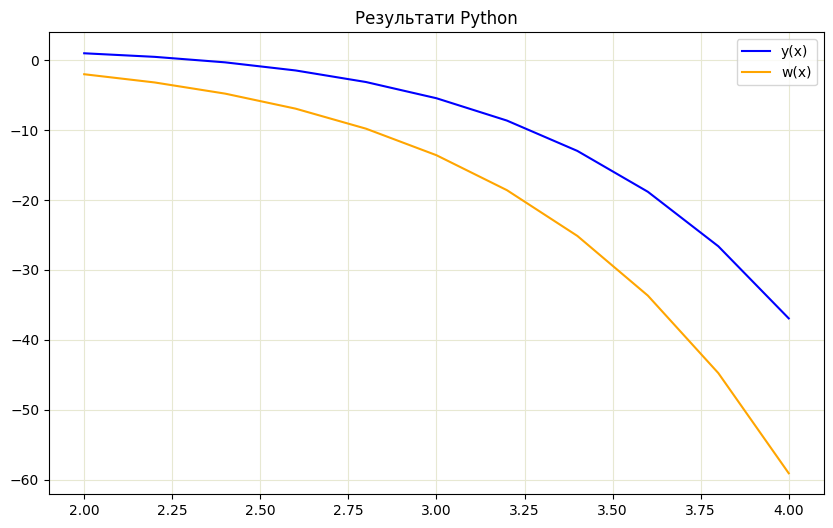

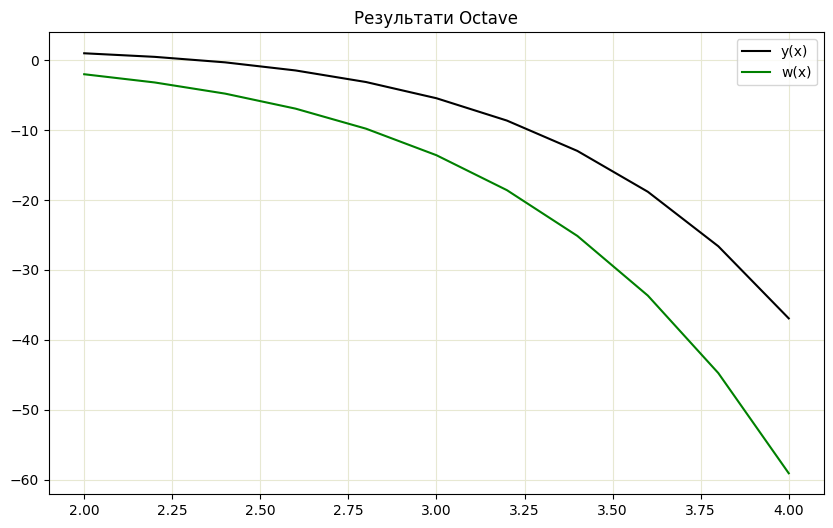

Як бачимо, результати спіпадають


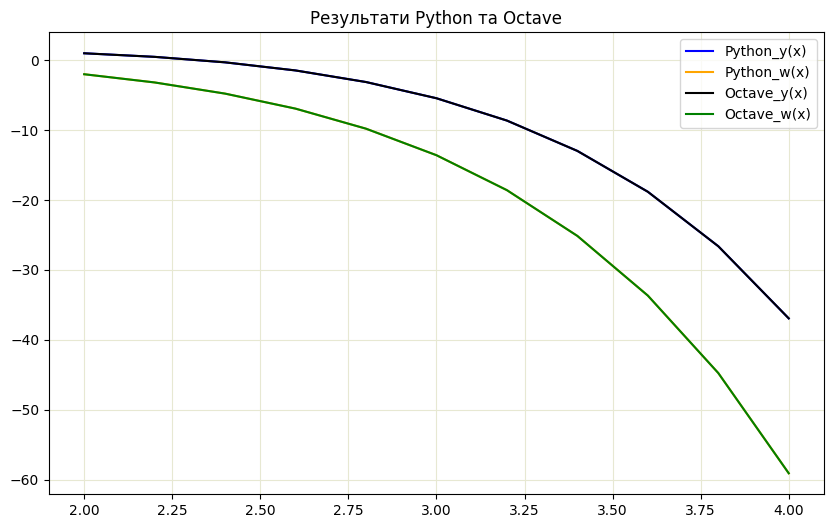

In [4]:
# Створюємо графік для результатів Python
plt.figure(figsize=(10, 6))
plt.plot(df_python.index, df_python['y(x)'], label='y(x)', color='blue')
plt.plot(df_python.index, df_python['w(x)'], label='w(x)', color='orange')
plt.title('Результати Python')
plt.legend()
plt.grid(c='#E7E8D2')
plt.show()

# Створюємо графік для результатів Octave
plt.figure(figsize=(10, 6))
plt.plot(df_octave.index, df_octave['y(x)'], label='y(x)', color='black')
plt.plot(df_octave.index, df_octave['w(x)'], label='w(x)', color='green')
plt.title('Результати Octave')
plt.legend()
plt.grid(c='#E7E8D2')
plt.show()

# Об'єднуємо результати на одному графіку
print('Як бачимо, результати спіпадають')
plt.figure(figsize=(10, 6))
plt.plot(df_python.index, df_python['y(x)'], label='Python_y(x)', color='blue')
plt.plot(df_python.index, df_python['w(x)'], label='Python_w(x)', color='orange')
plt.plot(df_octave.index, df_octave['y(x)'], label='Octave_у(x)', color='black')
plt.plot(df_octave.index, df_octave['w(x)'], label='Octave_w(x)', color='green')
plt.title('Результати Python та Octave')
plt.legend()
plt.grid(c='#E7E8D2')
plt.show()
